In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
import tensorflow.keras.models
from tqdm import tqdm
import os

In [4]:
base_dir = os.getcwd()

fotos_dir = os.path.join(base_dir, 'Fotos')

In [6]:
rus = pd.read_pickle('rus_agg_con_categorias_y_fotos_sa.p')


# rus = rus.head(1000)

print('Cantidad de fotos', len(rus))



# 

Cantidad de fotos 1928


In [7]:
rus.sample(3)

,index,SMP,Oficinas,Lote,Público,Industrial,Comercial-Servicios,Estacionamiento,Abandonado-Obra,Departamentos,Casa-PH,Categoria,web_ciudad,file,filename,hay_foto
1303,21271,013-046-004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Casa-PH,http://fotos.usig.buenosaires.gob.ar//getFoto?...,013-046-004.jpg,C:\Users\maxir\Artificial Intelligence\Desafio...,1
1066,17589,011-061-035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Departamentos,http://fotos.usig.buenosaires.gob.ar//getFoto?...,011-061-035.jpg,C:\Users\maxir\Artificial Intelligence\Desafio...,1
791,13899,010-011-019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Casa-PH,http://fotos.usig.buenosaires.gob.ar//getFoto?...,010-011-019.jpg,C:\Users\maxir\Artificial Intelligence\Desafio...,1


In [9]:
rus.shape[0]

1928

Levanto las imágenes y las convierto en un vector

In [10]:
img_width = 350
img_height = 350
X = []
for i in tqdm(range(0,rus.shape[0])):
  path = os.path.join(os.getcwd(),'Fotos',rus['file'][i])

  try:
    img = image.load_img(path, target_size=(img_width, img_height, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)
    rus.loc[i, 'file_valida'] = 1
  except:
    rus.loc[i, 'file_valida'] = 0

X = np.array(X)
rus = rus[rus.file_valida == 1].reset_index(drop=True) 
X.shape


100%|█████████████████████████████████████████████████████████████████████████████| 1928/1928 [00:06<00:00, 306.59it/s]


(1928, 350, 350, 3)

Departamentos, Comercial-Servicios


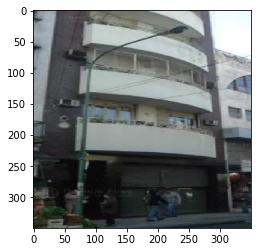

In [11]:
nimg = rus.sample(1).index.values[0]
print(rus['Categoria'][nimg])
plt.imshow(X[nimg])


In [12]:
rus.columns

Index(['index', 'SMP', 'Oficinas', 'Lote', 'Público', 'Industrial',
       'Comercial-Servicios', 'Estacionamiento', 'Abandonado-Obra',
       'Departamentos', 'Casa-PH', 'Categoria', 'web_ciudad', 'file',
       'filename', 'hay_foto', 'file_valida'],
      dtype='object')

In [13]:
# y = rus.drop(['SMP', 'Categoria', 'web_ciudad', 'file', 'filename', 'hay_foto', 'file_valida'], axis=1)

# y = rus['Casa-PH']
y = rus[['Casa-PH', 'Departamentos', 'Comercial-Servicios', 'Estacionamiento']]
y = y.to_numpy()
y.shape



(1928, 4)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.15)


Crear Modelo CNN

In [15]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(4, activation='sigmoid'))  # primer parámetro es cantidad de categorías



model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Train on 1638 samples, validate on 290 samples
Epoch 1/15
1638/1638 [==============================] - 9s 6ms/sample - loss: 0.8876 - accuracy: 0.5635 - val_loss: 4.1157 - val_accuracy: 0.4276
Epoch 2/15
1638/1638 [==============================] - 5s 3ms/sample - loss: 0.7856 - accuracy: 0.6120 - val_loss: 9.9606 - val_accuracy: 0.4276
Epoch 3/15
1638/1638 [==============================] - 5s 3ms/sample - loss: 0.7299 - accuracy: 0.6276 - val_loss: 5.6223 - val_accuracy: 0.4276
Epoch 4/15
1638/1638 [==============================] - 5s 3ms/sample - loss: 0.6877 - accuracy: 0.6464 - val_loss: 3.7433 - val_accuracy: 0.4897
Epoch 5/15
1638/1638 [==============================] - 5s 3ms/sample - loss: 0.6404 - accuracy: 0.6777 - val_loss: 4.4010 - val_accuracy: 0.5310
Epoch 6/15
1638/1638 [==============================] - 5s 3ms/sample - loss: 0.6092 - accuracy: 0.6918 - val_loss: 4.1456 - val_accuracy: 0.5491
Epoch 7/15
1638/1638 [==============================] - 5s 3ms/sample - loss:

In [18]:
def plot_history(name, history, legend, plot_val=True):
    fig, ax = plt.subplots(1,2,figsize=(14,6))
    fig.suptitle(name)
    
    if not isinstance(history, list):
        history = [history]
        
    for h in history:
        acc = h.history['accuracy']
        loss = h.history['loss']
        if plot_val:
            val_loss = h.history['val_loss']
            val_acc = h.history['val_accuracy']
        epochs = range(1, len(acc) + 1)

        ax[0].set_title('Loss')
        ax[0].set_xticks(ticks=epochs)
        lb, ub = ax[0].get_xlim( )
        ax[0].set_xticks( np.linspace(lb, ub, 6 ) )
        ax[0].set_ylim([0, 1])
        ax[0].set_yticks( np.linspace(0, 1, 6 ) )
        ax[0].set_ylabel('Loss')
        
        ax[0].plot(epochs, loss)
        if plot_val:
            ax[0].plot(epochs, val_loss)
            
        ax[1].set_title('Accuracy')
        ax[1].set_xticks(ticks=list(epochs))
        ax[1].set_xlabel('Epochs')
        lb, ub = ax[1].get_xlim( )
        ax[1].set_xticks( np.linspace(lb, ub, 6 ) )
        ax[1].set_ylim([0, 1])
        ax[1].set_yticks( np.linspace(0, 1, 6 ) )
        ax[1].set_ylabel('Accuracy')
        ax[1].plot(epochs, acc)
        
        if plot_val:
            ax[1].plot(epochs, val_acc)
        
    ax[0].legend([l+' loss' for l in legend])
    ax[1].legend([l+' accuracy' for l in legend])

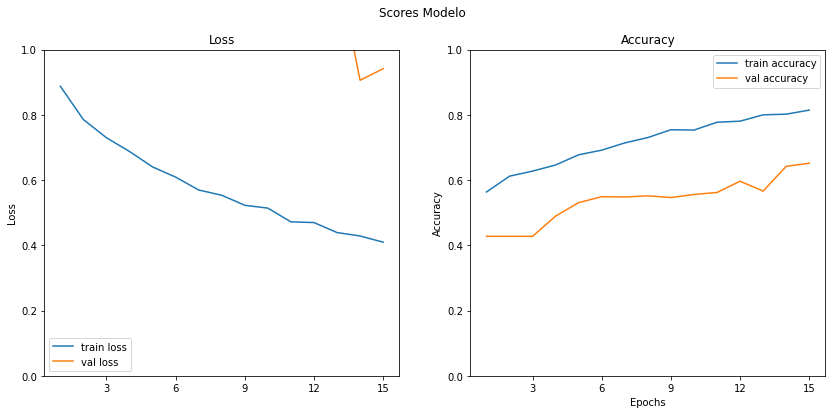

In [19]:
plot_history('Scores Modelo', history, ['train', 'val'])

In [20]:
model.evaluate(X_test, y_test)

290/290 [==============================] - 1s 5ms/sample - loss: 0.9416 - accuracy: 0.6517


[0.9415512438478141, 0.65172416]

Transfer Learning

In [24]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(350, 350, 3))

In [26]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 350, 350, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 350, 350, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 350, 350, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 175, 175, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 175, 175, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 175, 175, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 87, 87, 128)       0     

In [27]:
# conv_base.trainable = False

In [28]:
X_train[0].shape

(350, 350, 3)

In [29]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', input_shape = X_train[0].shape))
model.add(layers.Dropout(0.5))
model.add(Flatten())
model.add(layers.Dense(4, activation='sigmoid'))








In [30]:
conv_base.trainable = False

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 10, 10, 512)       14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 1028      
Total params: 27,823,172
Trainable params: 13,108,484
Non-trainable params: 14,714,688
_________________________________

In [32]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history2 = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=20,
                    validation_data=(X_test, y_test))

Train on 1638 samples, validate on 290 samples
Epoch 1/15
1638/1638 [==============================] - 33s 20ms/sample - loss: 0.6205 - acc: 0.6670 - val_loss: 0.5662 - val_acc: 0.7181
Epoch 2/15
1638/1638 [==============================] - 26s 16ms/sample - loss: 0.5163 - acc: 0.7512 - val_loss: 0.5424 - val_acc: 0.7259
Epoch 3/15
1638/1638 [==============================] - 26s 16ms/sample - loss: 0.4701 - acc: 0.7920 - val_loss: 0.5014 - val_acc: 0.7526
Epoch 4/15
1638/1638 [==============================] - 25s 15ms/sample - loss: 0.4289 - acc: 0.8135 - val_loss: 0.5083 - val_acc: 0.7457
Epoch 5/15
1638/1638 [==============================] - 27s 16ms/sample - loss: 0.3823 - acc: 0.8433 - val_loss: 0.4622 - val_acc: 0.7853
Epoch 6/15
1638/1638 [==============================] - 26s 16ms/sample - loss: 0.3555 - acc: 0.8503 - val_loss: 0.4976 - val_acc: 0.7638
Epoch 7/15
1638/1638 [==============================] - 26s 16ms/sample - loss: 0.3305 - acc: 0.8701 - val_loss: 0.4889 - val

In [33]:
model.save('modelo1.h5')

In [34]:
def plot_history(name, history, legend, plot_val=True):
    fig, ax = plt.subplots(1,2,figsize=(14,6))
    fig.suptitle(name)
    
    if not isinstance(history, list):
        history = [history]
        
    for h in history:
        acc = h.history['acc']
        loss = h.history['loss']
        if plot_val:
            val_loss = h.history['val_loss']
            val_acc = h.history['val_acc']
        epochs = range(1, len(acc) + 1)

        ax[0].set_title('Loss')
        ax[0].set_xticks(ticks=epochs)
        lb, ub = ax[0].get_xlim( )
        ax[0].set_xticks( np.linspace(lb, ub, 6 ) )
        ax[0].set_ylim([0, 1])
        ax[0].set_yticks( np.linspace(0, 1, 6 ) )
        ax[0].set_ylabel('Loss')
        
        ax[0].plot(epochs, loss)
        if plot_val:
            ax[0].plot(epochs, val_loss)
            
        ax[1].set_title('Accuracy')
        ax[1].set_xticks(ticks=list(epochs))
        ax[1].set_xlabel('Epochs')
        lb, ub = ax[1].get_xlim( )
        ax[1].set_xticks( np.linspace(lb, ub, 6 ) )
        ax[1].set_ylim([0, 1])
        ax[1].set_yticks( np.linspace(0, 1, 6 ) )
        ax[1].set_ylabel('Accuracy')
        ax[1].plot(epochs, acc)
        
        if plot_val:
            ax[1].plot(epochs, val_acc)
        
    ax[0].legend([l+' loss' for l in legend])
    ax[1].legend([l+' accuracy' for l in legend])

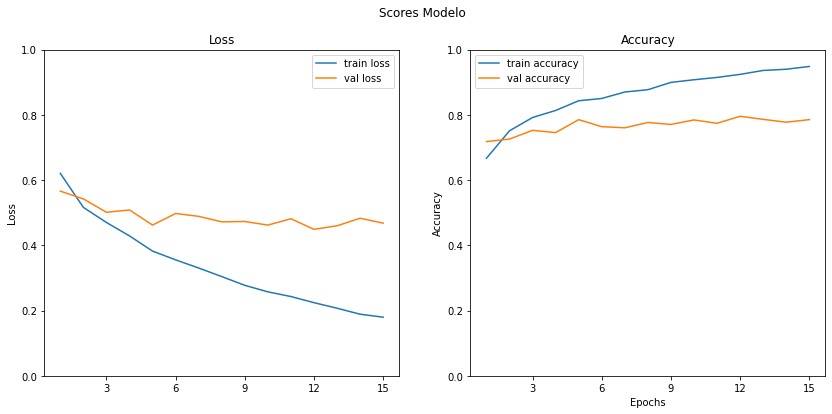

In [35]:
plot_history('Scores Modelo', history2, ['train', 'val'])

In [36]:
model1 = tensorflow.keras.models.load_model('modelo1.h5')

In [37]:
model1.evaluate(X_test, y_test)

290/290 [==============================] - 8s 28ms/sample - loss: 0.4680 - acc: 0.7853


[0.46800502662000987, 0.78534484]